# Melanoma Detection - CNN - Assignment

### Problem Statement:

To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early.
It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing all the important libraries

In [106]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### Data Reading/Data Understanding

In [107]:
## Getting the data by mounting the google drive:
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [108]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [109]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


#### Observation:

Following are the observations made from the images across the skin cancer types:

Total Number of Images : 2357 images

Number of train Images : 2239 images

Number of test Images  : 118 images

Number of classes : 9 

### Load using keras.preprocessing
Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Creating dataset
Define some parameters for the loader:

In [110]:
batch_size = 32
img_height = 180
img_width = 180

In [111]:
## Creating train dataset with above parameters(img_heigh, img_width, batch_size), and seed 123
## Also splitting data into 80% data for training and 20% data for validation
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'training',
    image_size=(img_height, img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [112]:
## Creating validation dataset with above parameters(img_heigh, img_width, batch_size), and seed 123
## Also splitting data into 80% data for training and 20% data for validation
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir_train,
    seed=123,
    validation_split= 0.2,
    subset= 'validation',
    image_size=(img_height,img_width),
    batch_size = batch_size
)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [113]:
## Getting all the class names in a list
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
Creating a plot to visualize one instance of all the nine classes present in the dataset


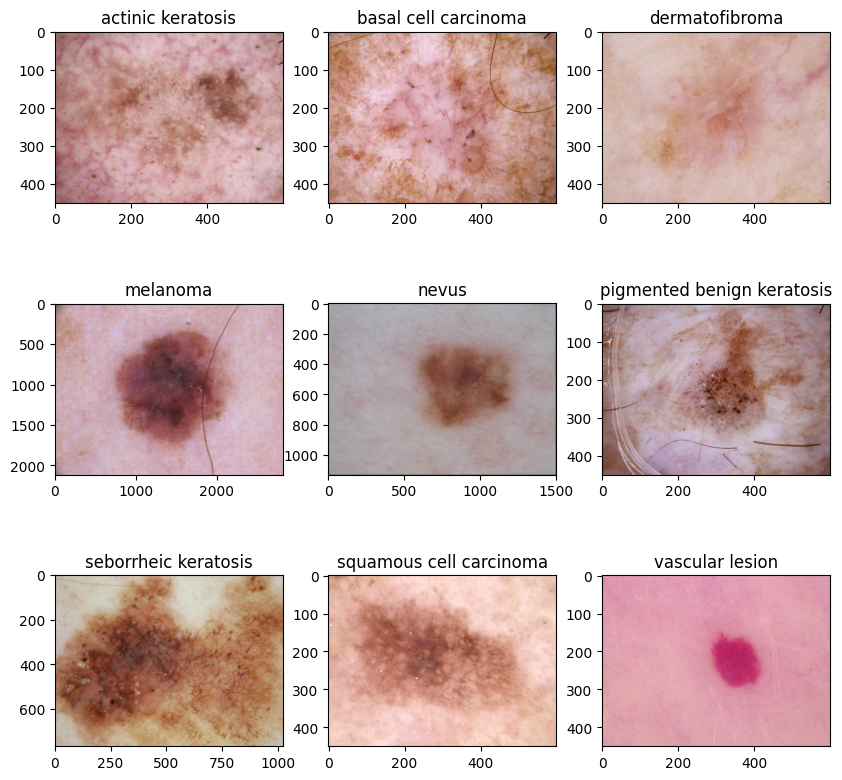

In [114]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

for index in range(9) : 
  plt.subplot(3, 3, index + 1)
  img = plt.imread(str(list(data_dir_train.glob(class_names[index]+'/*.jpg'))[1]))
  plt.title(class_names[index])
  plt.imshow(img)

#### Obsveration:

The above plot shows one image from each skin cancer class of the data set

The image_batch is a tensor of the shape (32, 180, 180, 3). This is a batch of 32 images of shape 180x180x3 (the last dimension refers to color channels RGB). The label_batch is a tensor of the shape (32,), these are corresponding labels to the 32 images.

Dataset.cache() keeps the images in memory after they're loaded off disk during the first epoch.

Dataset.prefetch() overlaps data preprocessing and model execution while training.

In [115]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creating Model 1 with a data set as such

##### Create a CNN model, which can accurately detect 9 classes present in the dataset. Use layers.experimental.preprocessing.Rescaling to normalize pixel values between (0,1). The RGB channel values are in the [0, 255] range. This is not ideal for a neural network. Here, it is good to standardize values to be in the [0, 1]



In [116]:
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
num_of_classes = 9
model = Sequential([ layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(num_of_classes, activation = "softmax"))

### Compiling Model 1

In [117]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [118]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_8 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 180, 180, 32)      2432      
                                                                 
 conv2d_36 (Conv2D)          (None, 180, 180, 32)      25632     
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 90, 90, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_37 (Conv2D)          (None, 90, 90, 32)        25632     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 45, 45, 32)       0         
 g2D)                                                

### Training Model 1

In [119]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 25s 163ms/step - loss: 2.0648 - accuracy: 0.1869 - val_loss: 1.9480 - val_accuracy: 0.2752
Epoch 2/20
56/56 [==============================] - 5s 90ms/step - loss: 2.0387 - accuracy: 0.1847 - val_loss: 2.0242 - val_accuracy: 0.1924
Epoch 3/20
56/56 [==============================] - 5s 92ms/step - loss: 2.0309 - accuracy: 0.2093 - val_loss: 2.0481 - val_accuracy: 0.2058
Epoch 4/20
56/56 [==============================] - 5s 90ms/step - loss: 2.0221 - accuracy: 0.1897 - val_loss: 2.0306 - val_accuracy: 0.2081
Epoch 5/20
56/56 [==============================] - 5s 89ms/step - loss: 2.0153 - accuracy: 0.1998 - val_loss: 2.0214 - val_accuracy: 0.2058
Epoch 6/20
56/56 [==============================] - 5s 91ms/step - loss: 2.0073 - accuracy: 0.2059 - val_loss: 2.0565 - val_accuracy: 0.2192
Epoch 7/20
56/56 [==============================] - 5s 88ms/step - loss: 1.9453 - accuracy: 0.2673 - val_loss: 1.8808 - val_accuracy: 0.3020
Epoch 8/20


### Visualizing training results for Model 1

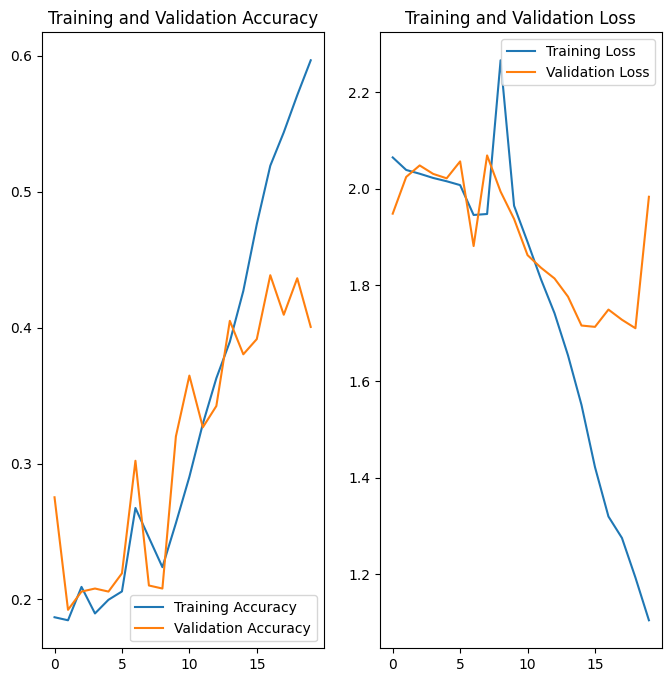

In [120]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations from Model 1:

The model is overfitting because we can also see difference in accuracy abd loss functions in training froma above plot

After 20 epochs, the accuracy is just around 59% because there are features to remember the pattern.

### Class Imbalance Analysis

Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

<BarContainer object of 9 artists>

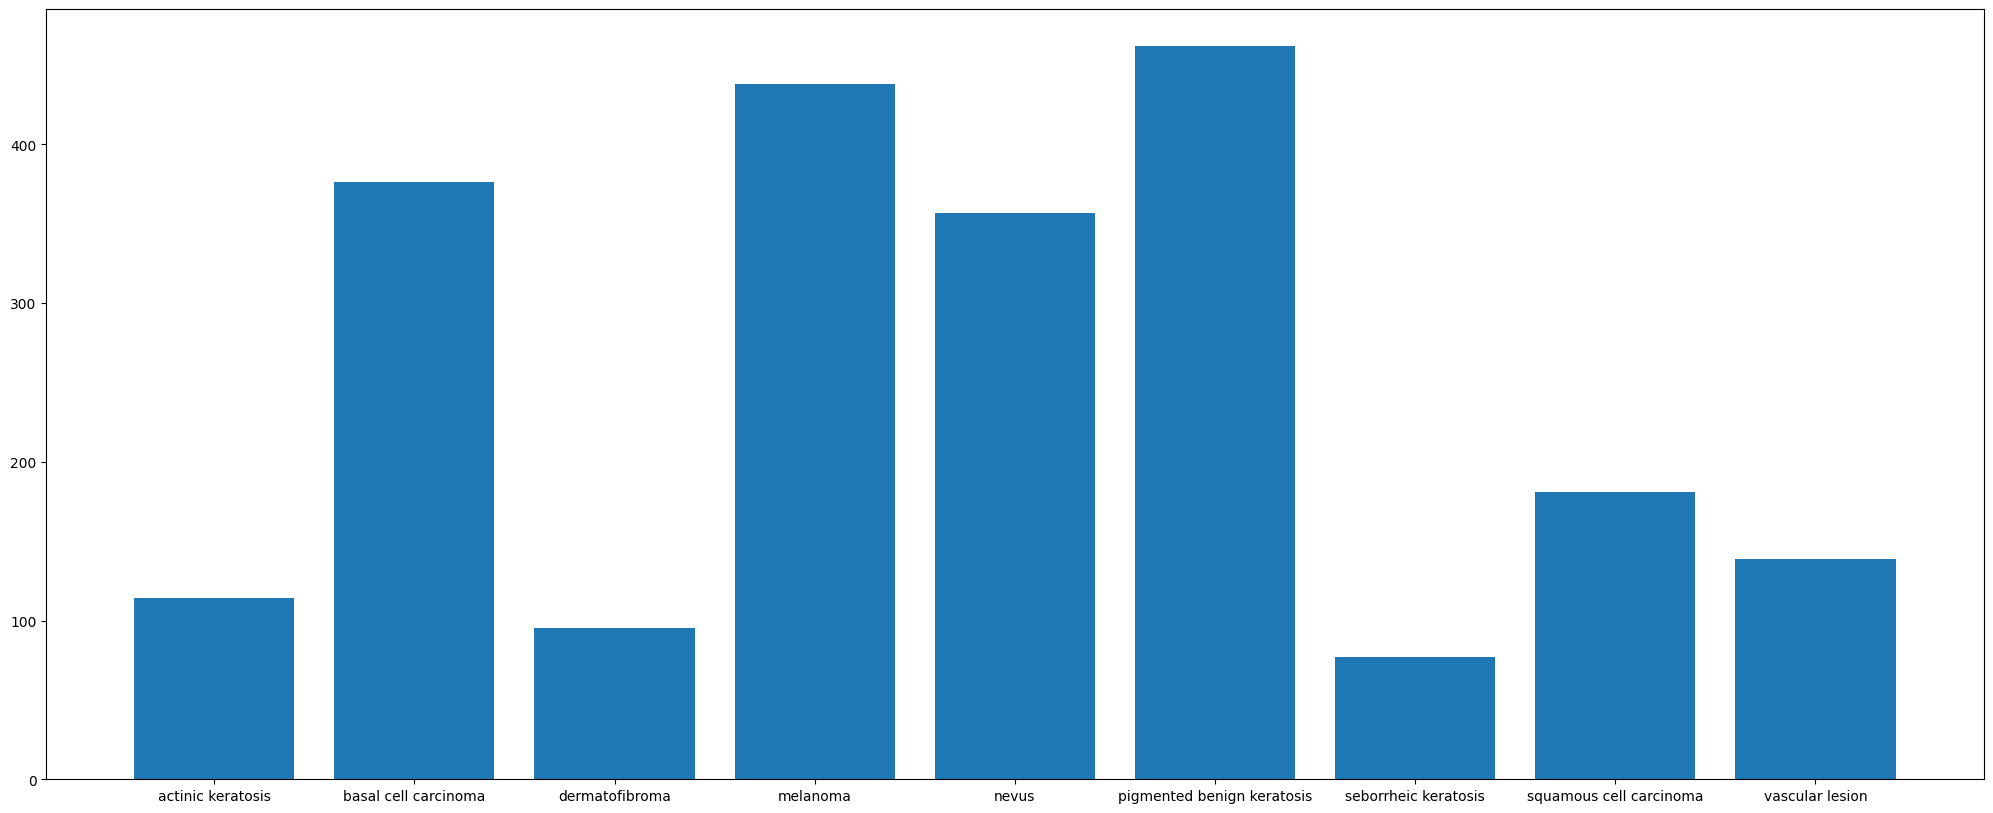

In [121]:
## Plot to find the frequency of each class

count=[]
for i in class_names:
    count.append(len(list(data_dir_train.glob(i+'/*.jpg'))))
plt.figure(figsize=(25,10))
plt.bar(class_names,count)

#### From above plot we can answer for these questions:

#### - Q.1 Which class has the least number of samples?
#### - Ans.1 seborrheic keratosis has least number of samples

#### - Q.2 Which classes dominate the data in terms proportionate number of samples?
#### - Ans.2 melanoma and pigmented benign keratosis are the classes that dominate the samples

#### Observations:

From above plot and findings we can see there class imbalance in the dataset and we must use an appropriate strategy to rectify the class imbalance

### Creating Model 2 with Data Augmentation

##### Create a CNN model, by applying data augmentation strategies like Horizontal/Vertical flipping and/or rotating and/or zooming the images 

In [122]:
data_augument = keras.Sequential([
                             layers.experimental.preprocessing.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
                             layers.experimental.preprocessing.RandomRotation(0.2, fill_mode='reflect'),
                             layers.experimental.preprocessing.RandomZoom(height_factor=(0.2, 0.3), width_factor=(0.2, 0.3), fill_mode='reflect')
])

### Visualizing the data augmentations applied in Model 2

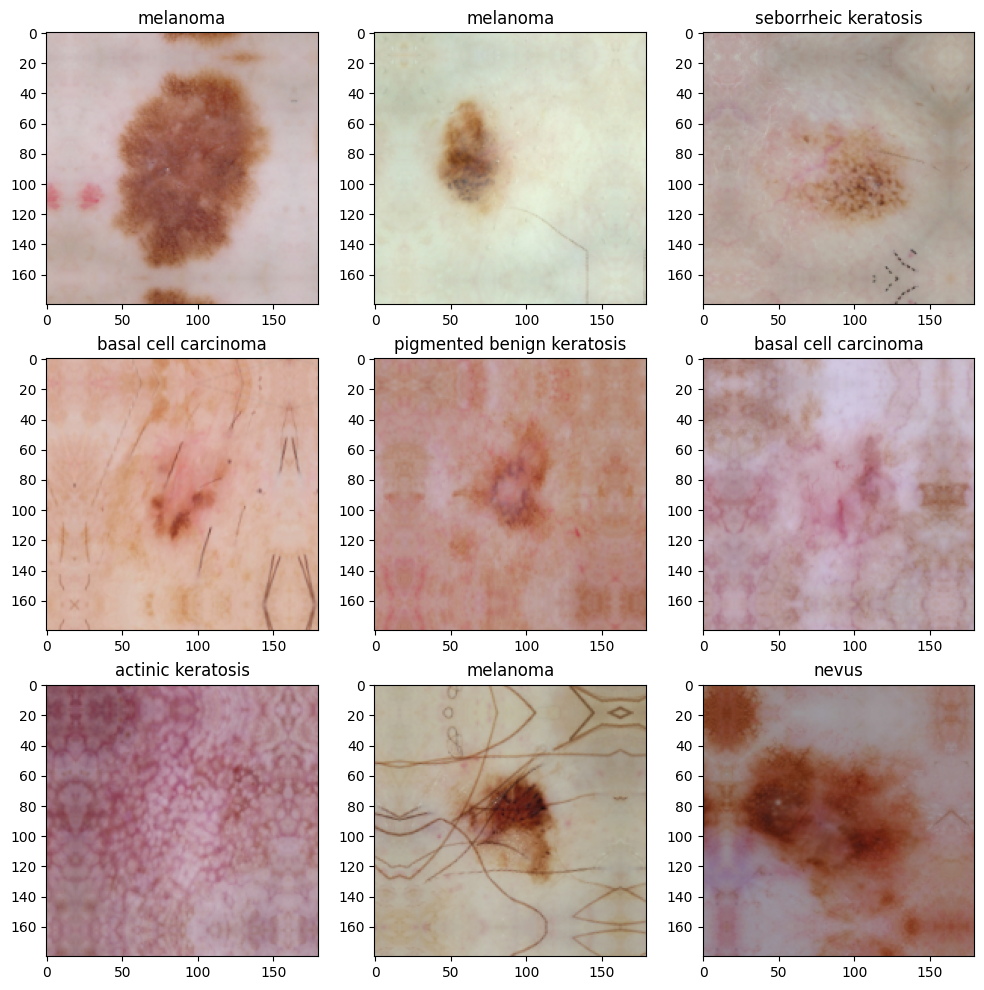

In [123]:
plt.figure(figsize=(12, 12))
for imgs, labels in train_ds.take(1):
    for index in range(9) :
        ax = plt.subplot(3, 3, index + 1)
        plt.imshow(data_augument(imgs)[index].numpy().astype("uint8"))
        plt.title(class_names[labels[index]])
        

In [124]:
model2 = Sequential([data_augument,  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model2.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model2.add(MaxPool2D(pool_size=(2,2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(num_of_classes, activation = "softmax"))

### Compiling Model 2

In [125]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training Model 2

In [126]:
history2 = model2.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 9s 104ms/step - loss: 2.0450 - accuracy: 0.1992 - val_loss: 1.9783 - val_accuracy: 0.1879
Epoch 2/20
56/56 [==============================] - 6s 101ms/step - loss: 2.0420 - accuracy: 0.2238 - val_loss: 2.0310 - val_accuracy: 0.1969
Epoch 3/20
56/56 [==============================] - 6s 98ms/step - loss: 2.0201 - accuracy: 0.2076 - val_loss: 1.9820 - val_accuracy: 0.2282
Epoch 4/20
56/56 [==============================] - 6s 105ms/step - loss: 1.9585 - accuracy: 0.2573 - val_loss: 1.9499 - val_accuracy: 0.2662
Epoch 5/20
56/56 [==============================] - 6s 98ms/step - loss: 1.8985 - accuracy: 0.2907 - val_loss: 1.8554 - val_accuracy: 0.3154
Epoch 6/20
56/56 [==============================] - 6s 99ms/step - loss: 1.9238 - accuracy: 0.2712 - val_loss: 1.9414 - val_accuracy: 0.2170
Epoch 7/20
56/56 [==============================] - 5s 97ms/step - loss: 1.8899 - accuracy: 0.3092 - val_loss: 1.7594 - val_accuracy: 0.3602
Epoch 8/20

### Visualizing training results for Model 2

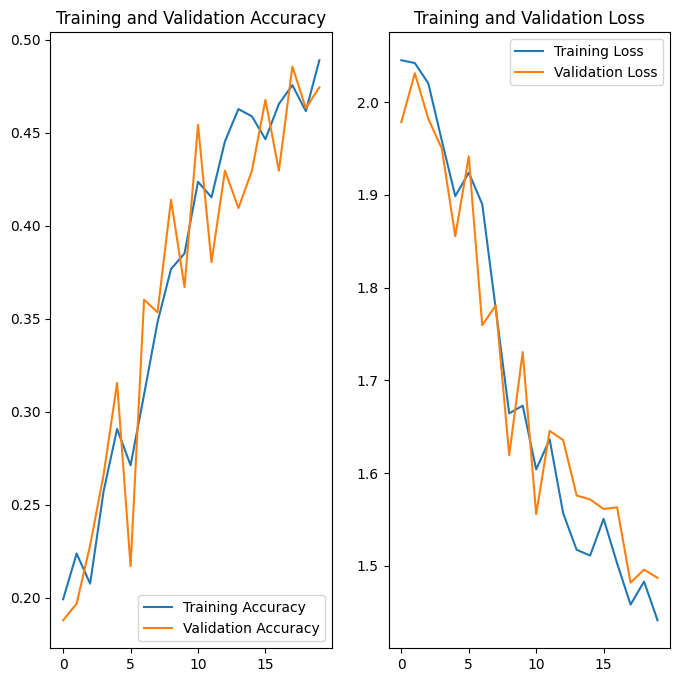

In [127]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']

loss = history2.history['loss']
val_loss = history2.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations from Model 2:

After 20 epochs, accuracy is around 48%. There is no improvement in accuracy

But the training and validation accuracies are similar and so we can see the overfitting problem has solved due to data augmentation

In [128]:
## Finding the distribution of classes in the training dataset
path_list=[]
lesion_list=[]
for i in class_names:
      
    for j in data_dir_train.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)
dataframe_dict_original = dict(zip(path_list, lesion_list))
original_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
original_df

,Path,Label
0,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
1,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
2,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
3,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
4,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion
2235,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion
2236,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion
2237,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion


### Using Augmentor to rectify the class imbalance

In [129]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


To use Augmentor, the following general procedure is followed:

Instantiate a Pipeline object pointing to a directory containing your initial image data set.
Define a number of operations to perform on this data set using your Pipeline object.
Execute these operations by calling the Pipeline’s sample() method.

In [137]:
## Creating pipeline using Augmentor with rotation probability of 0.7, max rotations set to 10 and giving it 500 samples

import Augmentor
for index in class_names:
    pipeline = Augmentor.Pipeline("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/" + index)
    pipeline.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    pipeline.sample(500)

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F0FB015F760>: 100%|██████████| 500/500 [00:21<00:00, 23.58 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F0FB02CEBC0>: 100%|██████████| 500/500 [00:22<00:00, 21.98 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F301BC340>: 100%|██████████| 500/500 [00:21<00:00, 23.50 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2592x1944 at 0x7F0F301BD120>: 100%|██████████| 500/500 [01:44<00:00,  4.76 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F0F2A230C40>: 100%|██████████| 500/500 [01:37<00:00,  5.14 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F0F2A210760>: 100%|██████████| 500/500 [00:20<00:00, 24.49 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F0F2EE25990>: 100%|██████████| 500/500 [00:49<00:00, 10.01 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F2EE24940>: 100%|██████████| 500/500 [00:21<00:00, 23.34 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F0F2A210280>: 100%|██████████| 500/500 [00:22<00:00, 21.97 Samples/s]


In [138]:
data_dir_train1 = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
image_count_train1 =len(list(data_dir_train1.glob('*/output/*.jpg')))
print(image_count_train1)


4500


#### Lets see the distribution of augmented data after adding new images to the original training data.

In [139]:
for i in class_names:
    for j in data_dir_train1.glob(i+'/*.jpg'):
        path_list.append(str(j))
        lesion_list.append(i)

dataframe_dict_original = dict(zip(path_list, lesion_list))
new_df = pd.DataFrame(list(dataframe_dict_original.items()),columns = ['Path','Label'])
new_df

,Path,Label
0,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
1,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
2,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
3,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
4,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,actinic keratosis
...,...,...
2234,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion
2235,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion
2236,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion
2237,/content/gdrive/MyDrive/CNN_assignment/Skin ca...,vascular lesion


In [140]:
new_df['Label'].value_counts()

pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: Label, dtype: int64

### Model 3 using Augmentor

In [141]:
batch_size = 32
img_height = 180
img_width = 180

In [142]:
import pathlib
data_dir_train1 = pathlib.Path("/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_train1

PosixPath('/content/gdrive/MyDrive/CNN_assignment/Skin cancer ISIC The International Skin Imaging Collaboration/Train')

In [143]:
image_count_train1 = len(list(data_dir_train1.glob('*/*.jpg')))
print(image_count_train1)

2239


### Creating Train and Validation DS for Model 3

In [144]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = "training",
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [145]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train1,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [146]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Creating Model 3 with Augmentor

In [147]:
model3 = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model3.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu', input_shape = (180, 180, 32)))
model3.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
model3.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Conv2D(filters = 64, kernel_size = (5,5),padding = 'Same', activation ='relu'))
model3.add(MaxPool2D(pool_size=(2,2)))
model3.add(Dropout(0.25))
model3.add(Flatten())
model3.add(Dense(num_of_classes, activation = "softmax"))

### Compiling Model 3

In [148]:
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training Model 3

In [149]:
epochs = 50
history3 = model3.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 50s 136ms/step - loss: 2.1856 - accuracy: 0.1378 - val_loss: 2.1869 - val_accuracy: 0.1359
Epoch 2/50
169/169 [==============================] - 16s 97ms/step - loss: 2.1580 - accuracy: 0.1625 - val_loss: 2.1622 - val_accuracy: 0.1581
Epoch 3/50
169/169 [==============================] - 16s 97ms/step - loss: 2.1385 - accuracy: 0.1690 - val_loss: 2.1582 - val_accuracy: 0.1611
Epoch 4/50
169/169 [==============================] - 16s 95ms/step - loss: 2.1327 - accuracy: 0.1632 - val_loss: 2.1580 - val_accuracy: 0.1596
Epoch 5/50
169/169 [==============================] - 16s 95ms/step - loss: 2.1246 - accuracy: 0.1651 - val_loss: 2.1193 - val_accuracy: 0.1737
Epoch 6/50
169/169 [==============================] - 16s 95ms/step - loss: 1.9773 - accuracy: 0.2253 - val_loss: 1.8542 - val_accuracy: 0.2732
Epoch 7/50
169/169 [==============================] - 16s 96ms/step - loss: 1.7026 - accuracy: 0.3544 - val_loss: 1.5819 - val_accuracy: 0.4343
Ep

### Visualizing training results for Model 3

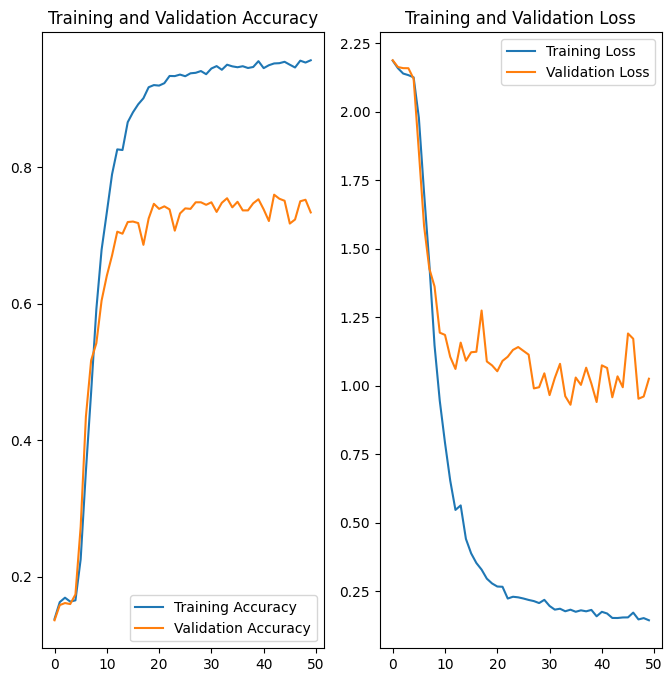

In [150]:
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations from Model 3:

After 50 epochs we can see the training accuracy is 95% and validation accuracy is 73%

Eventhough the class imbalance is addressed, There is overfitting which can be addressed by making changes in the layers

### Creating Model 4

Making changes to the archictecte by adding dropout layers and more dense layers

In [151]:
model4 = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])
model4.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model4.add(layers.MaxPool2D(pool_size=(2,2)))
model4.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model4.add(layers.MaxPool2D(pool_size=(2,2)))
model4.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model4.add(layers.MaxPool2D(pool_size=(2,2)))
model4.add(layers.Dropout(0.5))
model4.add(layers.Flatten())
model4.add(layers.Dense(128,activation='relu'))
model4.add(layers.Dropout(0.25))
model4.add(layers.Dense(len(class_names),activation='softmax'))

model4.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_48 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_37 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_49 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 43, 43, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 41, 41, 128)     

### Compiling Model 4

In [152]:
model4.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training model 4

In [153]:
epochs = 25
history4 = model4.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


169/169 [==============================] - 14s 58ms/step - loss: 1.9652 - accuracy: 0.2463 - val_loss: 1.5802 - val_accuracy: 0.3786
Epoch 2/25
169/169 [==============================] - 9s 53ms/step - loss: 1.5634 - accuracy: 0.4043 - val_loss: 1.4546 - val_accuracy: 0.4350
Epoch 3/25
169/169 [==============================] - 9s 52ms/step - loss: 1.3971 - accuracy: 0.4787 - val_loss: 1.2989 - val_accuracy: 0.5226
Epoch 4/25
169/169 [==============================] - 9s 51ms/step - loss: 1.2729 - accuracy: 0.5215 - val_loss: 1.1014 - val_accuracy: 0.5954
Epoch 5/25
169/169 [==============================] - 9s 52ms/step - loss: 1.1821 - accuracy: 0.5495 - val_loss: 1.0875 - val_accuracy: 0.5984
Epoch 6/25
169/169 [==============================] - 9s 52ms/step - loss: 1.0545 - accuracy: 0.6053 - val_loss: 1.0402 - val_accuracy: 0.5961
Epoch 7/25
169/169 [==============================] - 9s 53ms/step - loss: 0.9528 - accuracy: 0.6441 - val_loss: 1.0202 - val_accuracy: 0.6355
Epoch 8/2

### Visualizing training reults for Model 4

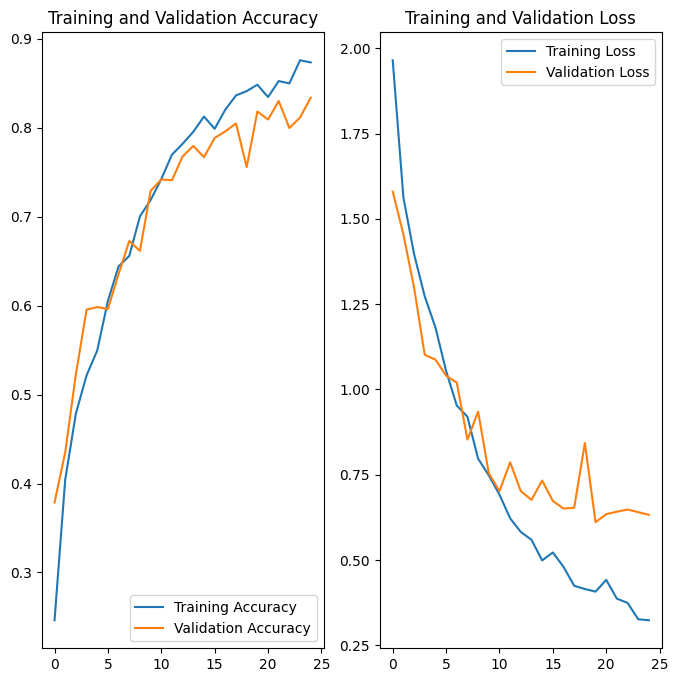

In [154]:
acc = history4.history['accuracy']
val_acc = history4.history['val_accuracy']

loss = history4.history['loss']
val_loss = history4.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Observations from Model 4:

The above model has an accuracy of 87% after 25 epochs and the validation accuracy also seems to be improved which indicates we have addressed the overfitting issue 

### Visualizing the finalized - Model 4

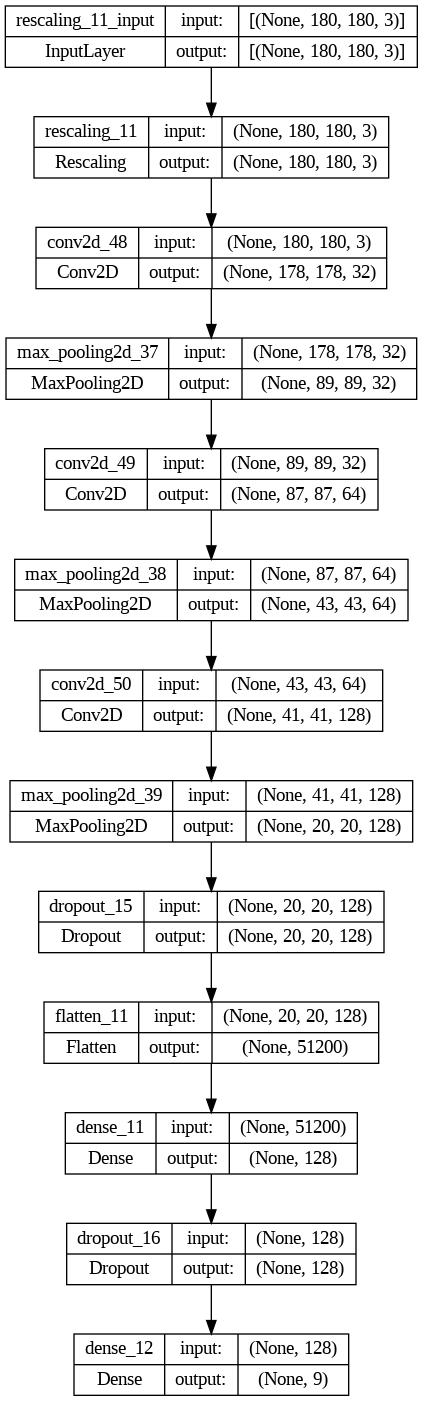

In [155]:
 from tensorflow.keras.utils import plot_model
plot_model(model4, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

### Model Prediction

1/1 [==============================] - 0s 20ms/step
Actual Class : basal cell carcinoma
Predictive Class : basal cell carcinoma


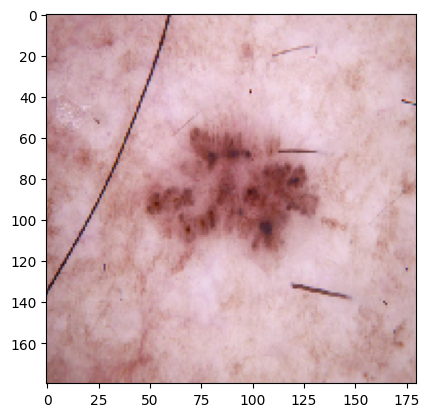

In [157]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img

Test_image_path = os.path.join(data_dir_test, class_names[1], '*')
Test_image = glob(Test_image_path)
Test_image = load_img(Test_image[-1],target_size=(180,180,3))
plt.imshow(Test_image)
plt.grid(False)

img = np.expand_dims(Test_image,axis=0)
pred = model.predict(img)
pred = np.argmax(pred)
pred_class = class_names[pred]
print("Actual Class : "+ class_names[1] +'\n'+ "Predictive Class : " + pred_class )